# BIG DATA MART

## Importing Libreries

In [176]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset
As according to question statement there are two datasets available in problem statement and they are: 1.train 2.test.
So, first import train data set and than import test dataset.

### 1. Train Dataset
Importing train data set as a df1

In [177]:
#Import the dataset

df1= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns of df1(train)

In [178]:
df1.shape

(8523, 12)

There are 8523 Rows and 12 Columns in train dataset

## Detailed description df1

In [179]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

## Datatypes of all columns in df1

In [180]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Some columns are having object datatypes :Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type.

Some columns are having floting datatype: Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales.

and rest is integer data type : Outlet_Establishment_Year, Item_Outlet_Sales is a target variable.

## Checking is there any null value in train dataset df1

In [181]:
#check is there any null value present in any column

df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are two columns are having missing data in it.
1. Item_Weight : 1463 rows are missing
2. Outlet_Size : 2410 rows are missing

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

#### 1. Distplot

In [182]:
fe = df1[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]]

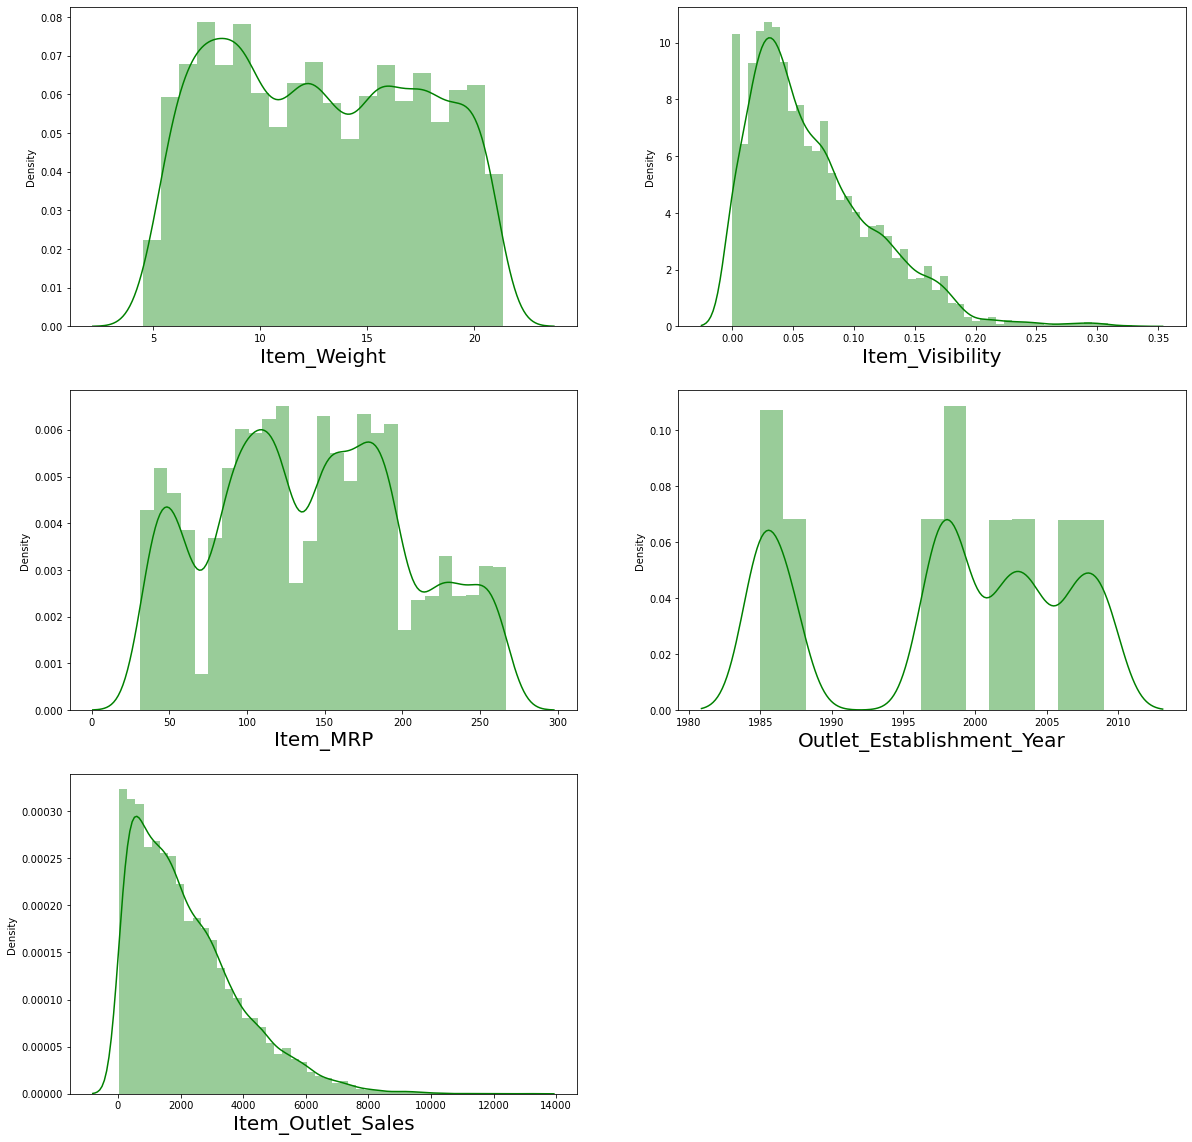

In [183]:
#Relationship Visualizing

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot, there are some variabls are almost normally distributed like, Item_Weight, Item_MRP and Item_Visibility is having skewness in it. 

Outlet_Establishment_Year is a catogorical variable so need to find skewness in it and Item_Outlet_Sales is a target variable.

#### 2. Boxplot

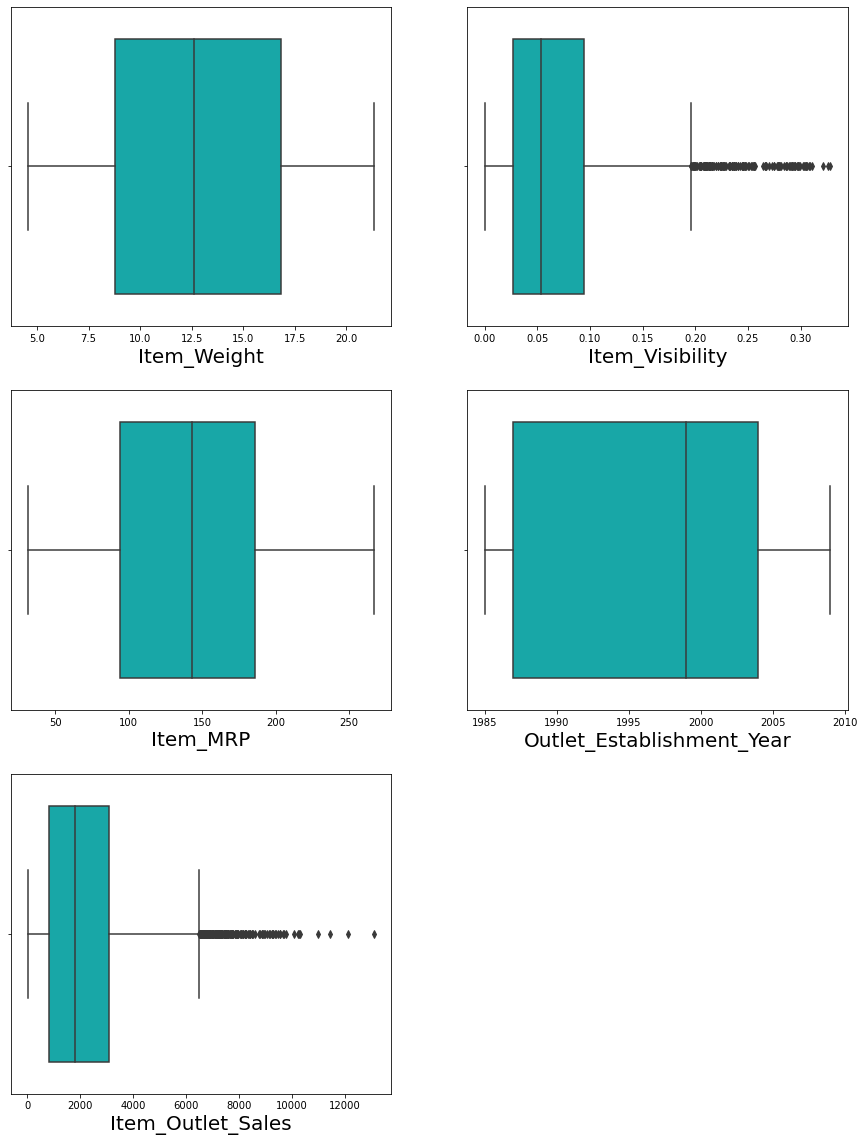

In [184]:
#Relationship Visualizing

plt.figure(figsize = (15,20), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

##### As we have seen in boxplot Item_Visibility is having outliers in it.

##### 3. Histplot

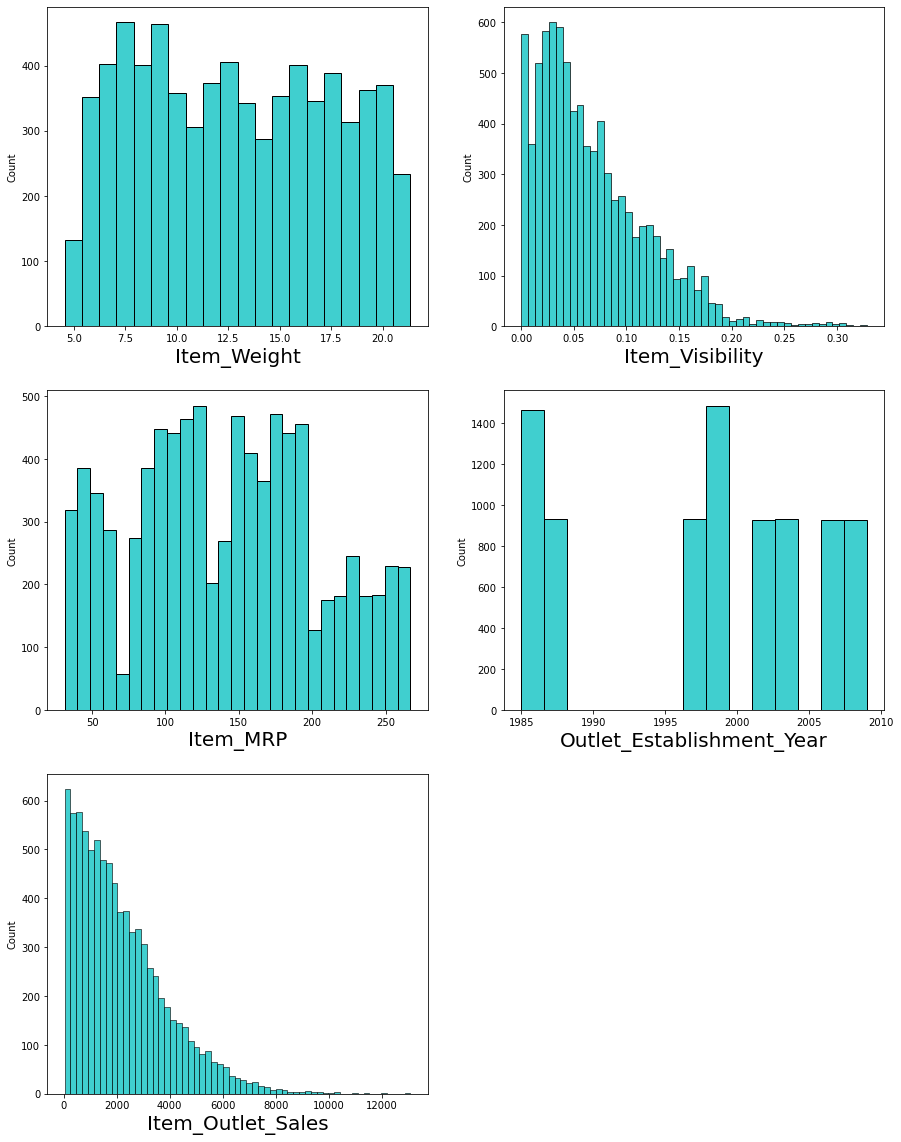

In [185]:
#Relationship Visualizing

plt.figure(figsize = (15,20), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sn.histplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

## Bi variate analysis
Bi variate analysis is works with two variables.

In [186]:
df_bi=df1.drop(['Outlet_Location_Type'], axis=1)
df_bi=df1.drop(['Outlet_Type'], axis=1)
df_bi=df1.drop(['Outlet_Size'], axis=1)

It is not possible inscatter plot to every variable relationship with target variable as it is not in proper form, so drop that column only for bivariate visualization.

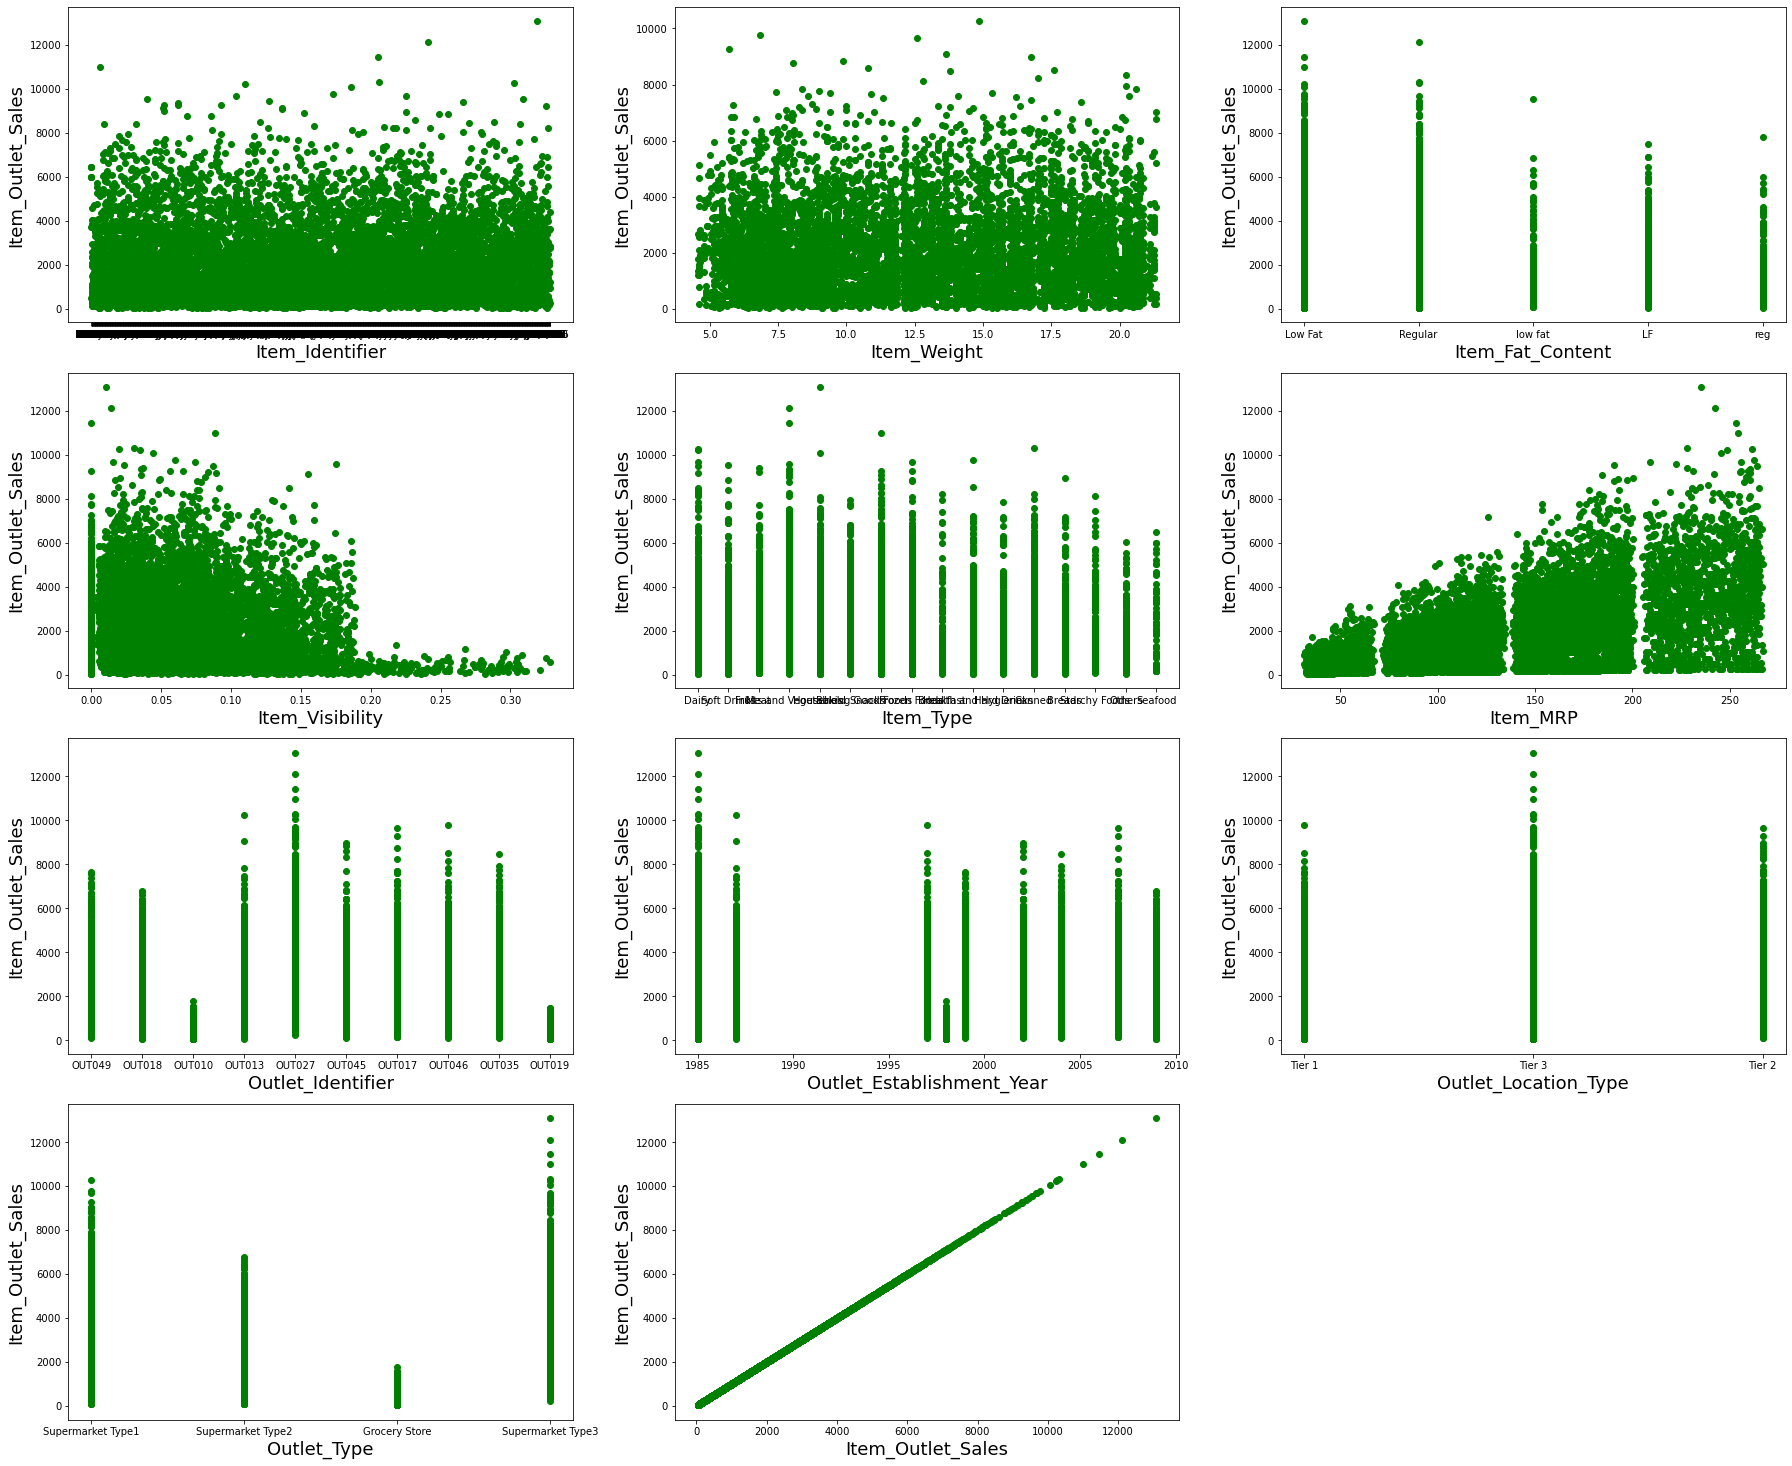

In [187]:
#Relationship Visualizing

plt.figure(figsize = (25,25), facecolor = 'white')
plotnumber = 1

for column in df_bi:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df_bi[column],df_bi['Item_Outlet_Sales'], color='g')
        plt.xlabel(column,fontsize=18)
        plt.ylabel('Item_Outlet_Sales', fontsize=18)
    plotnumber += 1
plt.tight_layout()

as we have seen in plot Item_MRP and Item_Outlet_Sales is having almost linear relationship with target variable and other variables are having non linear realationship with target variable and outliers are also present in some columns.

# Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

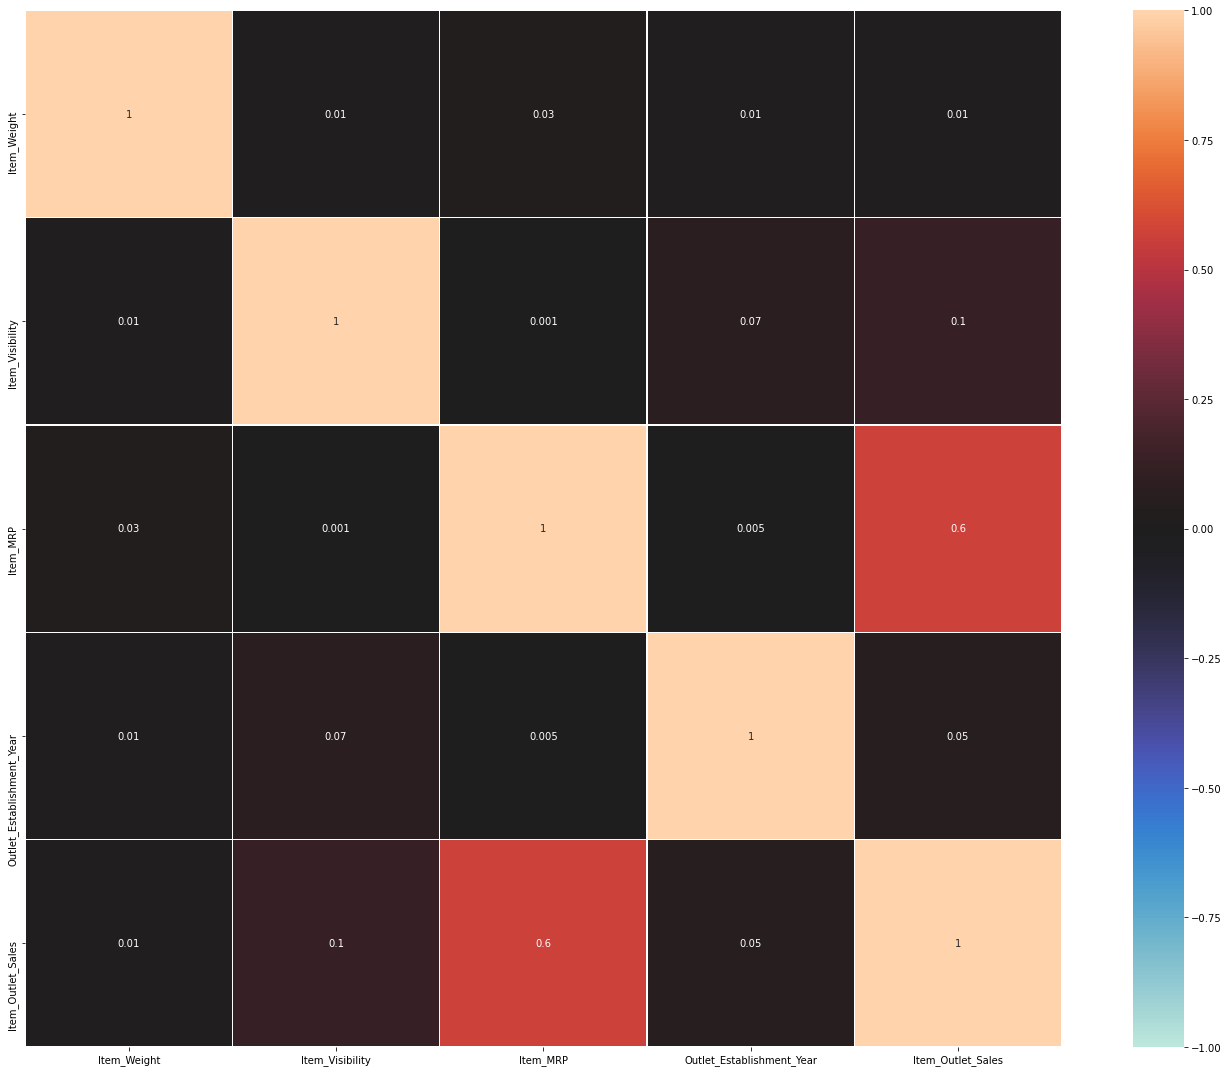

In [188]:
df1_cor = df1.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df1_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in heatmap Item_Outlet_Sales and Item_MRP are strongly correlated with each other and Item_weight column is weekly correlate with targate variable.

##### Find out which columns are positively and negatively correlated with each other

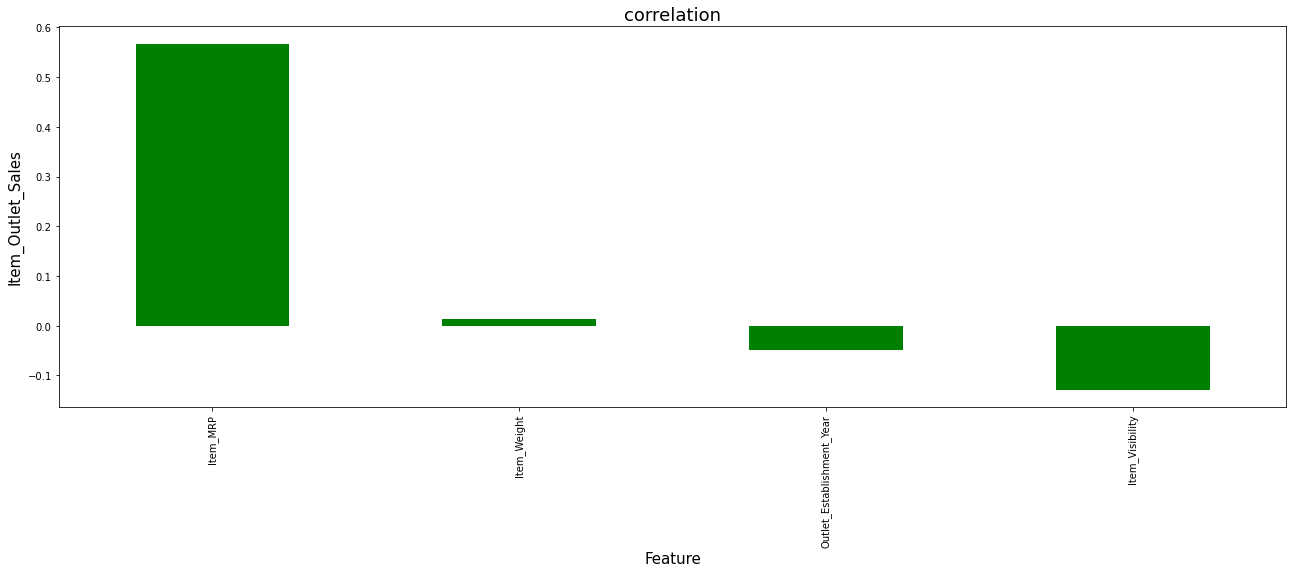

In [189]:
plt.figure(figsize=(22,7))
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

Item_weight column is weekly correlate with targate variable.

##### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed for next steps:

In [190]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Encoding
#### 1.Drop input variable 'Item_Identifier'

In [191]:
df1['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [192]:
df1['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDT07     9
NCJ30     9
FDD38     9
         ..
FDT35     1
FDQ60     1
FDY43     1
FDC23     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

As we have seen the Item_Identifier unique values, so we can drop this column.

In [193]:
#drop Item_Identifier colum
df1=df1.drop(['Item_Identifier'], axis=1)

#### 2. Encode input variable Item_Fat_Content

In [194]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [195]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we have seen in above Item_Fat_Content values LF and low fat and Low Fat is nothing but similer values.

and reg is nothing but Regular. So, we can club that and make 2 unique values in Item_Fat_Content column.

In [196]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('LF', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('low fat', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('reg', 'Regular')

In [197]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [198]:
# Replace Item_Fat_Content column to binary encoder
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({'Low Fat':1, 'Regular':0})

#### 3. Encode Item type

In [199]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [200]:
df1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [202]:
df1["Item_Type"] = le.fit_transform(df1["Item_Type"])

#### 4.Outlet_Identifier

In [203]:
df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [204]:
df1['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [205]:
#drop Outlet_Type colum as its just an identifier
df1=df1.drop(['Outlet_Identifier'], axis=1)

#### 5. Encode and treat missing values of Outlet_Size

In [206]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [207]:
df1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [208]:
df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0])

#### 6. Encode Outlet_Location_Type

In [209]:
df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [210]:
df1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [211]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [212]:
df1["Outlet_Location_Type"] = le.fit_transform(df1["Outlet_Location_Type"])

In [213]:
df1['Outlet_Location_Type'].unique()

array([0, 2, 1])

#### 7. Encode Outlet_Type

In [214]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [215]:
df1['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [216]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [217]:
df1["Outlet_Type"] = le.fit_transform(df1["Outlet_Type"])

In [218]:
df1['Outlet_Type'].unique()

array([1, 2, 0, 3])

## Handle missing value

In [219]:
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())

In [220]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,Medium,0,1,3735.1380
1,5.920,0,0.019278,14,48.2692,2009,Medium,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,Medium,0,1,2097.2700
3,19.200,0,0.000000,6,182.0950,1998,Medium,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,High,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,High,2,1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,Medium,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,Small,1,1,1193.1136
8521,7.210,0,0.145221,13,103.1332,2009,Medium,2,2,1845.5976


## 2. Test Dataset
Importing train data set as a df2

In [221]:
#Import the dataset

df2= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns df2(test)

In [222]:
df2.shape

(5681, 11)

There are 5681 Rows and 11 Columns in test dataset

## Detailed description df2

In [223]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

## Datatypes of all columns in df2

In [224]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Some columns are having object datatypes :Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type.

Some columns are having floting datatype: Item_Weight, Item_Visibility, Item_MRP.

and rest is integer data type : Outlet_Establishment_Year.

## Checking is there any null value in test dataset df2

In [225]:
#check is there any null value present in any column

df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

# Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

## 1.Outlier removal using Zscore

In [226]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_data = data[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", new_data.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-new_data.shape[0])/data.shape[0])

NameError: name 'data' is not defined

8.818% data loss after using Zscore technique

91.181% data remains.

In [ ]:
new_data.describe()

## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side 

In [ ]:
data2 = data

In [ ]:
#features in which outliers are detected
fe = data2[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]

In [ ]:
plt.figure(figsize=(25,20))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(4,3, graph)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [ ]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data2.quantile(0.25)

#3rd quantile 75%
q3 = data2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [ ]:
data2.describe()

## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR) 

##### Outliers removal from higher side 

In [ ]:
#as shown in boxplot we have outlier in higher side of fixed acidity also
#Remove outliers from higher side so, use higher side formula

fixaci_out = (9.200000 + (1.5*(9.200000 - 7.100000)))
fixaci_out

In [ ]:
index_out = np.where(data2['fixed acidity'] > fixaci_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from fixed acidity 1550 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of volatile acidity also
#Remove outliers from higher side so, use higher side formula

volaci_out = (0.640000 + (1.5*(0.640000 - 0.390000)))
volaci_out

In [ ]:
index_out = np.where(data2['volatile acidity'] > volaci_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from volatile acidity 1531 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of citric acidity also
#Remove outliers from higher side so, use higher side formula

citaci_out = (0.420000 + (1.5*(0.420000 - 0.090000)))
citaci_out

In [ ]:
index_out = np.where(data2['citric acid'] > citaci_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from citric acid 1530 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of residual sugar also
#Remove outliers from higher side so, use higher side formula

suger_out = (2.600000 + (1.5*(2.600000 - 1.900000)))
suger_out

In [ ]:
index_out = np.where(data2['residual sugar'] > suger_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from residual suger 1392 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of chlorides also
#Remove outliers from higher side so, use higher side formula

chlorides_out = (q3.chlorides + (1.5*(iqr.chlorides)))
chlorides_out

In [ ]:
index_out = np.where(data2['chlorides'] > chlorides_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from cloride 1311 rows will remains in dataframe. 

In [ ]:
#Check the Outliers for chlorides
#Remove outliers from lower side so, use lower side formula

chlorides_out = (q1.chlorides - (1.5*(iqr.chlorides)))
chlorides_out

In [ ]:
index_out = np.where(data2['chlorides'] < chlorides_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from cloride 1302 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of free sulfur dioxide also
#Remove outliers from higher side so, use higher side formula

sulfur_out = (21.000000 + (1.5*(21.000000 - 7.000000)))
sulfur_out

In [ ]:
index_out = np.where(data2['free sulfur dioxide'] > sulfur_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from free sulfur dioxide 1286 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of total sulfur dioxide also
#Remove outliers from higher side so, use higher side formula

total_out = (62.000000 + (1.5*(62.000000 - 22.000000)))
total_out

In [ ]:
index_out = np.where(data2['total sulfur dioxide'] > total_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from total sulfur dioxide 1250 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of density also
#Remove outliers from higher side so, use higher side formula

density_out = (q3.density + (1.5*(iqr.density)))
density_out

In [ ]:
index_out = np.where(data2['density'] > density_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from density 1250 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in lower side of density also
#Remove outliers from lower side so, use lower side formula

density_out = (q1.density - (1.5*(iqr.density)))
density_out

In [ ]:
index_out = np.where(data2['density'] < density_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from density 1235 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in lower side of pH 
#Remove outliers from lower side so, use lower side formula

pH_out = (q1.pH - (1.5*(iqr.pH)))
pH_out

In [ ]:
index_out = np.where(data2['pH'] < pH_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from pH 1231 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of pH 
#Remove outliers from lower side so, use higher side formula

pH_out = (q3.pH + (1.5*(iqr.pH)))
pH_out

In [ ]:
index_out = np.where(data2['pH'] > pH_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from pH 1216 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of sulphates 
#Remove outliers from lower side so, use higher side formula

sulphates_out = (q3.sulphates + (1.5*(iqr.sulphates)))
sulphates_out

In [ ]:
index_out = np.where(data2['sulphates'] > sulphates_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from sulphates 1196 rows will remains in dataframe. 

In [ ]:
#as shown in boxplot we have outlier in higher side of alcohol 
#Remove outliers from lower side so, use higher side formula

alcohol_out = (q3.alcohol + (1.5*(iqr.alcohol)))
alcohol_out

In [ ]:
index_out = np.where(data2['alcohol'] > alcohol_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

after removing outliers from alcohol 1194 rows will remains in dataframe. 

#### After removing outliers using IQR technique there are 2101 rows will remains in dataset.
Now, find how much data loss in IQR method

74.68% data remains after removing outliers using IQR technique

25.32% data loss in IQR method

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

## Check the skewness and remove that

In [ ]:
new_data.skew()

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

fixed acidity, 
residual suger,
chlorides,
free sulfur dioxide,
total sulfur dioxide,
sulphates
alcohol                 

### Check outliers datatype. If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.

In [ ]:
new_data.dtypes

## Apply Log transformation to remove skewness

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [ ]:
#applying log transformation on skewed columns

new_data['fixed acidity'] = np.log(new_data['fixed acidity'])
new_data['residual sugar'] = np.log(new_data['residual sugar'])
new_data['chlorides'] = np.log(new_data['chlorides'])
new_data['free sulfur dioxide'] = np.log(new_data['free sulfur dioxide'])
new_data['total sulfur dioxide'] = np.log(new_data['total sulfur dioxide'])
new_data['sulphates'] = np.log(new_data['sulphates'])
new_data['alcohol'] = np.log(new_data['alcohol'])

In [ ]:
sn.distplot(new_data['fixed acidity'])

In [ ]:
sn.distplot(new_data['residual sugar'])

In [ ]:
sn.distplot(new_data['chlorides'])

In [ ]:
sn.distplot(new_data['free sulfur dioxide'])

In [ ]:
sn.distplot(new_data['total sulfur dioxide'])

In [ ]:
sn.distplot(new_data['sulphates'])

In [ ]:
sn.distplot(new_data['alcohol'])

##### As shown in plot skewness removes after using log transformation skewness removal technique.

## Seperating the columns into featuers and target:

#### X= features, y=Target 

In [ ]:
x = new_data.drop(columns = 'quality', axis=1)
y = new_data['quality']

## Scalling technique

In [ ]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

as we have saw in the table vif value is greater than 5 for two columns, so drop maximum value column to avoid multiclinearity issue.

In [ ]:
new_data=new_data.drop(['fixed acidity'], axis=1)

In [ ]:
x = new_data.drop(columns = 'quality', axis=1)
y = new_data['quality']

In [ ]:
ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [ ]:

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

after dropping column we can seen the value of vif is decreases, so multicolinearity issue will not occurs.

## Finding best random state 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 90)

## 1.Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

In [ ]:
pred_test=Log_reg.predict(x_test)

In [ ]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

###### The Accuracy score for logistic regression model is : 64.383
###### Cross validation score for logistic regression is : 57.544

## 2.Random forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

In [ ]:
Rfr =RandomForestClassifier(criterion = "gini", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

###### The Accuracy score for Random Forest Classifier model is : 70.20%
###### Cross validation score for Random Forest Classifier is : 57.75%

## 3.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

In [ ]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

In [ ]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

###### The Accuracy score for Decision tree Classifier model is : 59.24%
###### Cross validation score for Decision tree Classifier is : 47.11%

## 4.Support vector Classifier

In [ ]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

In [ ]:
pred_sv = sv.predict(x_test)
print(accuracy_score(y_test,pred_sv))

In [ ]:
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

In [ ]:
cv_score= cross_val_score(sv, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

###### The Accuracy score for SVC model is : 67.46%
###### Cross validation score for SVC is : 53.97%

## Comparison of all model

     Algorithms            Accuracy score    Cross validation   Difference
1.	Logistic Regression	         64.38%   	   57.54%	        6.83%
2.	Random forest Classifier	 70.20%	       57.75%	        12.45%
3.	Decision Tree	             59.24%	       47.11%	        12.12%
4.	SVC                          67.46%	       53.97%	        13.49%


### as shown in above table Logistic degression is having minimum difference, so Logistic Regression is best model

## Hyper parameter tunning

In [ ]:
#Logistic Regression

Parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : [1, 10, 0.1]}

In [ ]:
GCV=GridSearchCV(LogisticRegression(),Parameters,cv=5)

In [ ]:
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

In [ ]:
mod = LogisticRegression( C=1, penalty='none', solver='lbfgs')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

after hyper parameter tunning accuracy score is: 63.35%

In [ ]:
new_data['quality'].unique()

## ROC AUC curve to choose best model

In [ ]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [ ]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

In [ ]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

## find ROC AUC Score

In [ ]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

In [ ]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

In [ ]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test))

In [ ]:
#SVC
roc_auc_score(y_test, sv.predict(x_test))

## Saving the model 

In [ ]:
import joblib
joblib.dump(mod,"RedWineQuality.pkl")

## Loding model

In [ ]:
model = joblib.load("RedWineQuality.pkl")

In [ ]:
prediction = model.predict(x_test)

In [ ]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [ ]:
prediction.to_csv('Results.csv', index = False)
#prediction saving